In [1]:
import numpy as np
import matplotlib.pyplot as plt

import train.utils
# from train.utils import *
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
rho = 7.9e3 #7900
E = 1.8e11 #180e9
nu = 0.3
mu0 = E/(2*(1+nu))
lambda0 = E*nu/((1+nu)*(1-2*nu))

In [3]:
V0 = 1e-12 #1e-8
f0 = 120e3
n0 = 5
t_tot = 4.167e-5
tmax = 2.083e-4  

In [4]:
nondim= True

In [5]:
# nondim= False

In [6]:
if nondim:
    L_star = 0.3 
    T_star = L_star*np.sqrt(rho/mu0) 
    U_star = V0
    S_star = rho*L_star*U_star/(T_star**2)
else:
    L_star = 1 
    T_star = 1 
    U_star = 1 
    S_star = 1 

In [7]:
# Create a grid of x and z values
w = 0.3/L_star
h = 0.004/L_star
tmax = 2.083e-4/T_star

x = np.linspace(0, w, 100)
z = np.linspace(0, h, 100)
x, z = np.meshgrid(x, z)

x = x.flatten()[:, None]
z = z.flatten()[:, None]

tval = tmax * 0.5 * np.ones_like(x)

In [8]:
XYT_dist = np.concatenate((x, z, tval), 1)

In [9]:
_, values = train.utils.GenDist(XYT_dist, w, h)
Du_values, Dv_values, Dxx_values, Dzz_values, Dxz_values = values
Du_values  = Du_values.reshape(100, 100)
Dv_values  = Dv_values.reshape(100, 100)
Dxx_values = Dxx_values.reshape(100, 100)
Dzz_values = Dzz_values.reshape(100, 100)
Dxz_values = Dxz_values.reshape(100, 100)

In [10]:
cmap = 'rainbow'#'jet'#'viridis'#'turbo'

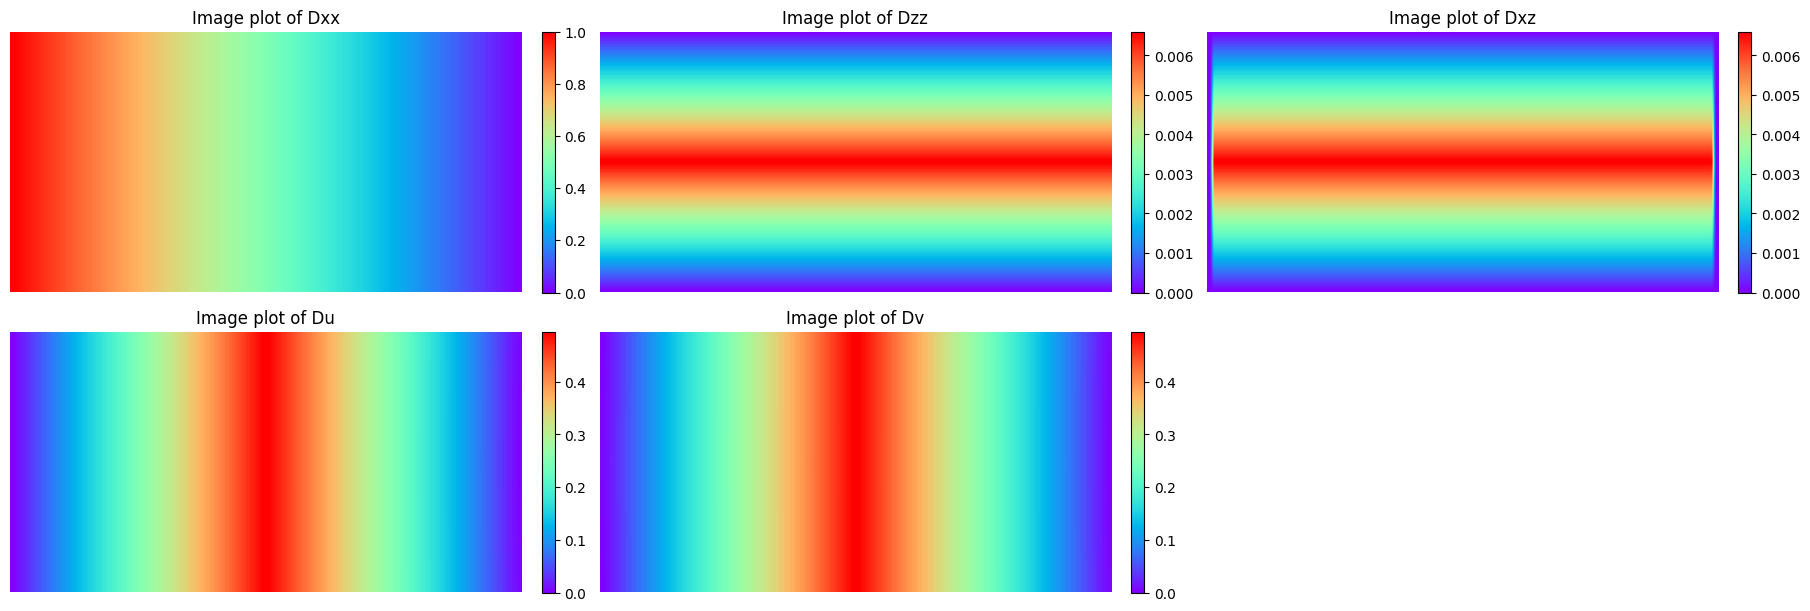

In [11]:
D_vals = {
    'Dxx': Dxx_values,
    'Dzz': Dzz_values,
    'Dxz': Dxz_values,
    'Du': Du_values,
    'Dv': Dv_values,
    'Dxv': Dv_values,
}

fig, axs = plt.subplots(2, 3, figsize=(18, 6), constrained_layout=True)

i = 0
for ax, (key, D_values) in zip(axs.flat, D_vals.items()):
    ax.set_axis_off()
    if i == 5:
        continue
    im = ax.imshow(D_values, extent=[0, w, 0, h], origin='lower', cmap=cmap, aspect='auto')
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax.set_title(f'Image plot of {key}')
    # ax.set_axis_off()
    # print(i)
    
    # Create a colorbar with the same height as the imshow
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    i += 1

plt.show()